In [1]:
from malaya_speech import Pipeline
import malaya_speech
import numpy as np

In [2]:
y, sr = malaya_speech.utils.read.wav('speech/example.wav')
len(y), sr

(200160, 16000)

In [3]:
vad = malaya_speech.vad.webrtc(sample_rate = sr, minimum_amplitude = int(np.quantile(np.abs(y), 0.2)))

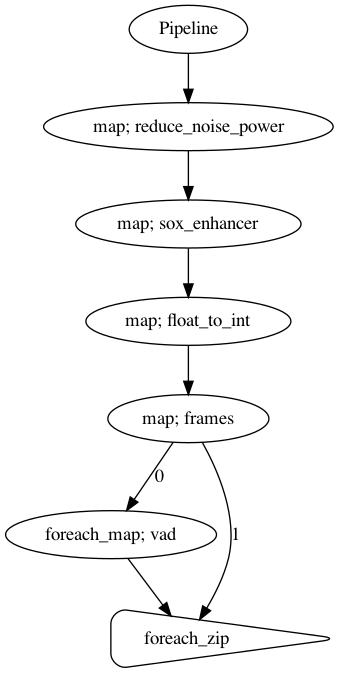

In [4]:
p = Pipeline()
frame = (
    p.map(malaya_speech.noise_reduction.reduce_noise_power)
    .map(malaya_speech.enhancement.sox_enhancer)
    .map(malaya_speech.utils.astype.float_to_int)
    .map(malaya_speech.utils.generator.frames)
)
vad_map = frame.foreach_map(vad)
foreach = frame.foreach_zip(vad_map)
p.visualize()

In [5]:
result = p(y)
result.keys()

dict_keys(['reduce_noise_power', 'sox_enhancer', 'float_to_int', 'frames', 'vad', 'foreach_zip'])

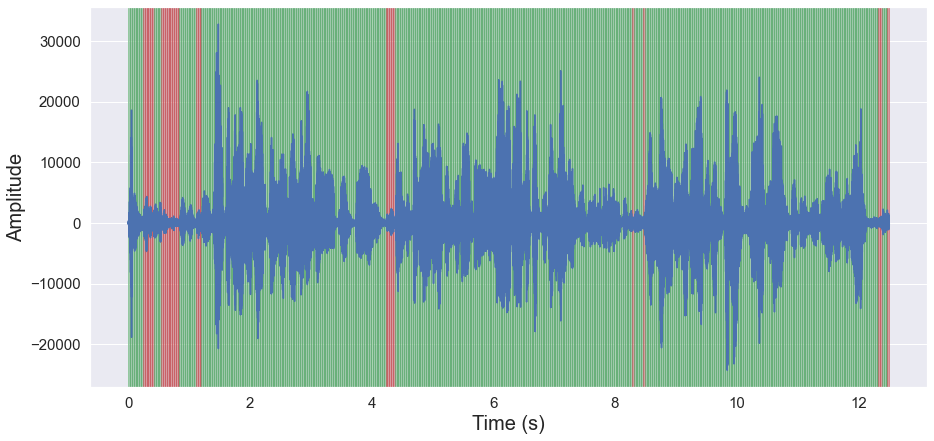

In [6]:
malaya_speech.extra.visualization.visualize_vad(y, result['foreach_zip'], sr)

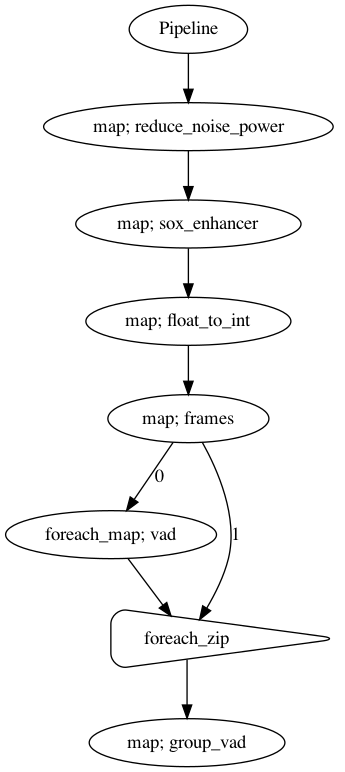

In [7]:
foreach.map(malaya_speech.vad.group_vad)
p.visualize()

In [8]:
result = p(y)

In [9]:
result['group_vad']

[(<malaya_speech.model.interface.FRAME at 0x14241c890>, True),
 (<malaya_speech.model.interface.FRAME at 0x14241cb10>, False),
 (<malaya_speech.model.interface.FRAME at 0x14241ccd0>, True),
 (<malaya_speech.model.interface.FRAME at 0x14241cd10>, False),
 (<malaya_speech.model.interface.FRAME at 0x14241cb90>, True),
 (<malaya_speech.model.interface.FRAME at 0x1428fc050>, False),
 (<malaya_speech.model.interface.FRAME at 0x1428fc090>, True),
 (<malaya_speech.model.interface.FRAME at 0x1428fc0d0>, False),
 (<malaya_speech.model.interface.FRAME at 0x1428fc110>, True),
 (<malaya_speech.model.interface.FRAME at 0x141dbc490>, False),
 (<malaya_speech.model.interface.FRAME at 0x1428fc150>, True),
 (<malaya_speech.model.interface.FRAME at 0x1428fc190>, False),
 (<malaya_speech.model.interface.FRAME at 0x1428fc1d0>, True),
 (<malaya_speech.model.interface.FRAME at 0x1428fc210>, False),
 (<malaya_speech.model.interface.FRAME at 0x1428fc250>, True),
 (<malaya_speech.model.interface.FRAME at 0x1424